# orbit-generation

> A library to handle and generate orbit data + experiments with it

This library has been built using [nbdev](https://nbdev.fast.ai/), which means that the source code of the library is stored in Jupyter notebooks inside the [`nbs`](/nbs/) folder. These notebooks are then automatically converted into Python files inside the [`orbit_generation`](/orbit_generation/) folder.  

Apart from the library, we have included research experiments using the library in the [`nbs_experiments`](/nbs_experiments/) folder.  

First, we will review the library structure, functions, and finally, we will explain the [experiments conducted](#Generative-Discovery-Experiment).


## Publications

- [SPAICE 2024: Generative Design of Periodic Orbits in the Restricted Three-Body Problem](https://zenodo.org/records/13885649)
- AAS 2025: Generative Astrodynamics: Trajectory Analysis and Design in the Restricted Three-Body Problem

## Structure

```text
.
|-- .devcontainer: Configuration for the development container.  
|  
|-- .github: workflows for continuous integration in Git.  
|  
|-- data: The folder where datasets are stored, in GitHub only example data is included. 
|   |-- example_data
|   |-- orbits_fix_1500 (needs to be downloaded)
|
|-- docs: Documentation files for the project. 
|
|-- experiments: Results about the experiments performed. 
|
|-- index_files: Auto-generated images to be used in the README.md. 
| 
|-- julia: Scripts written in Julia for specific computations. 
|   `-- convergence_algorithm.jl
|
|-- models: Some Machine Learning models used in the experiments.
|   |-- family_classificators
|   |-- orbit_generators
|
|-- nbs: Jupyter notebooks containing the source code for the library.  
|   |-- 00_constants.ipynb
|   |-- 01_data.ipynb
|   |-- 02_orbit_processing.ipynb
|   |-- 03_visualization.ipynb
|   |-- 04_orbit_statistics.ipynb
|   |-- 05_dataset.ipynb
|   |-- 06_architectures.ipynb
|   |-- 07_propagation.ipynb
|   |-- 08_experiment.ipynb
|   |-- 09_evaluation.ipynb
|   |-- 10_vae.ipynb
|   |-- 11_model_factory.ipynb
|   |-- 12_convergence.ipynb
|   |-- 13_latent_space.ipynb
|   |-- 14_path_utils.ipynb
|   |-- index.ipynb
|
|-- nbs_experiments: Notebooks with research experiments using the library.  
|   |-- 01_generative_discovery_em
|
|-- orbit_generation: Auto-generated Python package containing the processed library code. 
|  
|-- .gitignore: Defines files Git should ignore.
|  
|-- LICENSE: Project license file.  
|  
|-- MANIFEST.in: Specifies which files to include in the package distribution.   
|  
|-- README.md: Documentation for the project, auto-generated from index.ipynb.  
|  
|-- settings.ini: Configuration file for `nbdev`.  
|  
|-- setup.py: Script for installing the package.
```


## Library Modules

```sh
pip install orbit_generation
```

### 0. Constants

This module contains physical constants and orbit labels.

In [ ]:
from orbit_generation.constants import MU_BY_SYSTEM, EM_POINTS, EM_MU

In [ ]:
MU_BY_SYSTEM

{'SaE': 1.901109735892602e-07,
 'MP': 1.611081404409632e-08,
 'SaT': 0.0002366393158331484,
 'EM': 0.01215058560962404,
 'JE': 2.52801752854e-05,
 'SE': 3.0542e-06,
 'SM': 3.227154996101724e-07}

In [ ]:
EM_POINTS

{'Moon': (0.987849414390376, 0, 0),
 'Earth': (-0.01215058560962404, 0, 0),
 'Lagrange 1': (0.8369, 0, 0),
 'Lagrange 2': (1.1557, 0, 0),
 'Lagrange 3': (-1.0051, 0, 0),
 'Lagrange 4': (0.4879, 0.866, 0),
 'Lagrange 5': (0.4879, -0.866, 0)}

### 1. Data

This module provides utilities for handling orbit data.  

In [ ]:
from orbit_generation.data import get_example_orbit_data

In [ ]:
orbit_data = get_example_orbit_data()
orbit_data.shape

(400, 7, 100)

- Number of orbits: 400
- Time instants: 100

Every orbit dataset is organized within a three-dimensional NumPy array with the following structure:

<center><font size="5">data.shape = (num_orbits, 7, num_time_points)</font></center>

- **`num_orbits`**: Total number of distinct orbits in the dataset.  
- **`7`**: Represents the seven scalar values for each orbit at each time point, typically including:  
  - **`time`**: The time corresponding to each recorded state.  
  - **`posX`**, **`posY`**, **`posZ`**: Position components in the X, Y, and Z dimensions, respectively.  
  - **`velX`**, **`velY`**, **`velZ`**: Velocity components in the X, Y, and Z dimensions, respectively.  
- **`num_time_points`**: Number of time instants at which the data for each orbit is recorded.  


### 2. Processing

This module performs various processing tasks on the orbit data described above, including downsampling, interpolation, and reshaping.  

In [ ]:
from orbit_generation.processing import resample_3d_array

In [ ]:
resampled_orbit_data = resample_3d_array(data=orbit_data, axis=2, target_size= 50)
resampled_orbit_data.shape

(400, 7, 50)

- Initial time instants: 100
- Time instants after Resampling: 50

### 3. Visualization

This module handles the visualization of orbit trajectories and their features.  

#### Orbits

In [ ]:
from orbit_generation.visualize import visualize_static_orbits, export_dynamic_orbits_html

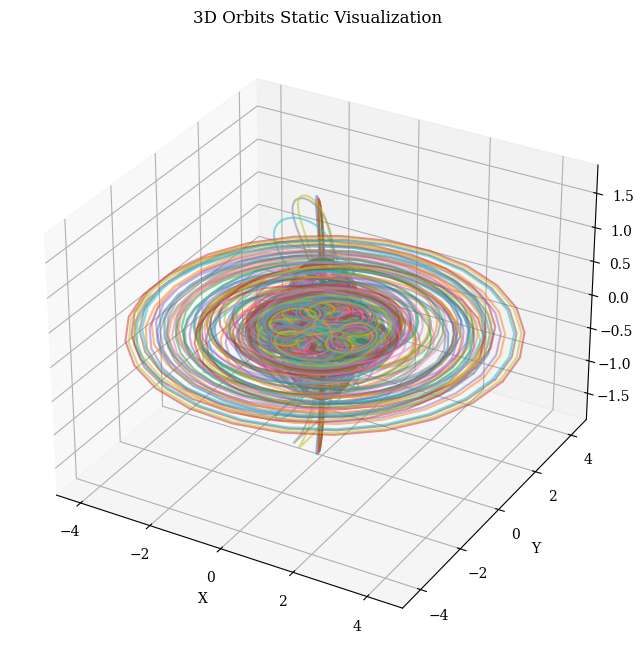

In [ ]:
visualize_static_orbits(orbit_data, show_legend=False)

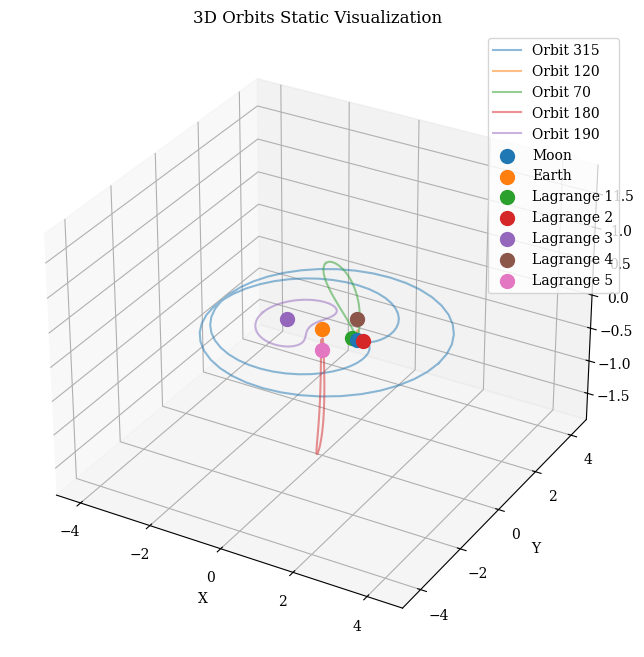

In [ ]:
visualize_static_orbits(data= orbit_data, orbit_indices=[315,120,70,180,190], point_dict=EM_POINTS)

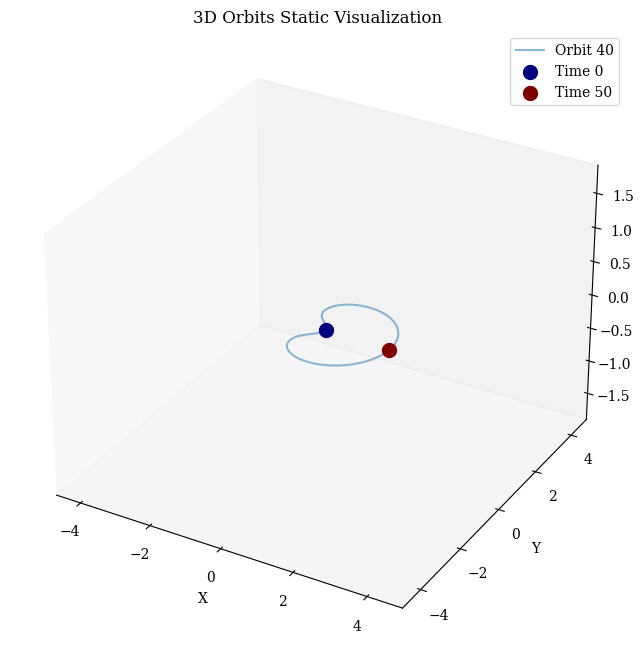

In [ ]:
visualize_static_orbits(data= orbit_data, time_instants=[0,50], orbit_indices=[40], plot_reference_box=False)

In [ ]:
export_dynamic_orbits_html(data=orbit_data, filename='../data/example_training_data/example_orbits_visualization.html')

Visualization saved to ../data/example_training_data/example_orbits_visualization.html


See the dynamic orbit visualziation [`here`](../data/example_training_data/example_orbits_visualization.html)

#### Features
Example plots performed with this module:

![distribution_rediscovered_discarded_fams](/nbs_experiments/01_generative_discovery_em/figures/distribution_rediscovered_discarded_fams.png)

![proportions_em](/nbs_experiments/01_generative_discovery_em/figures/proportions_em.png)


### 4. Statistics

This module analyzes the orbital data using descriptive statistics.  

In [ ]:
from orbit_generation.stats import plot_histograms_position, plot_histograms_comparison

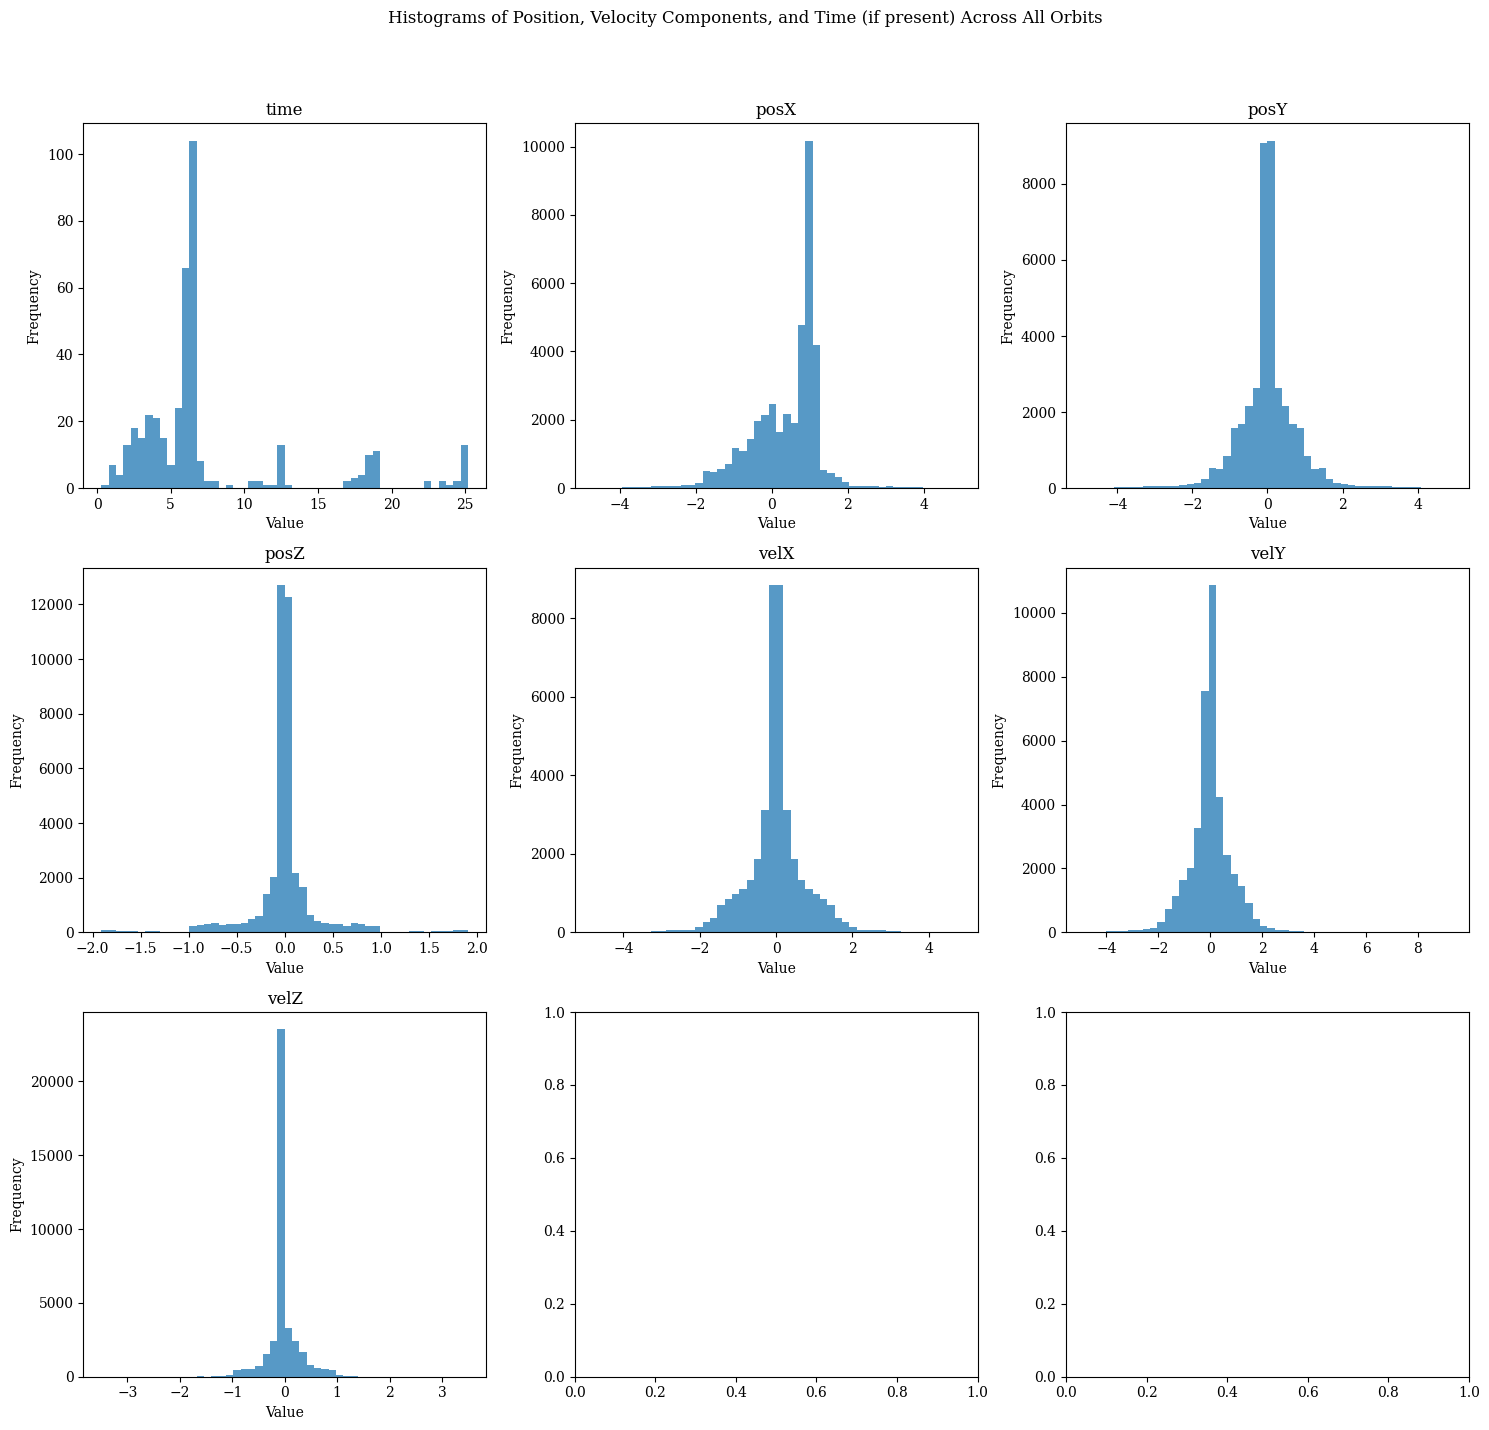

In [ ]:
plot_histograms_position(orbit_data)

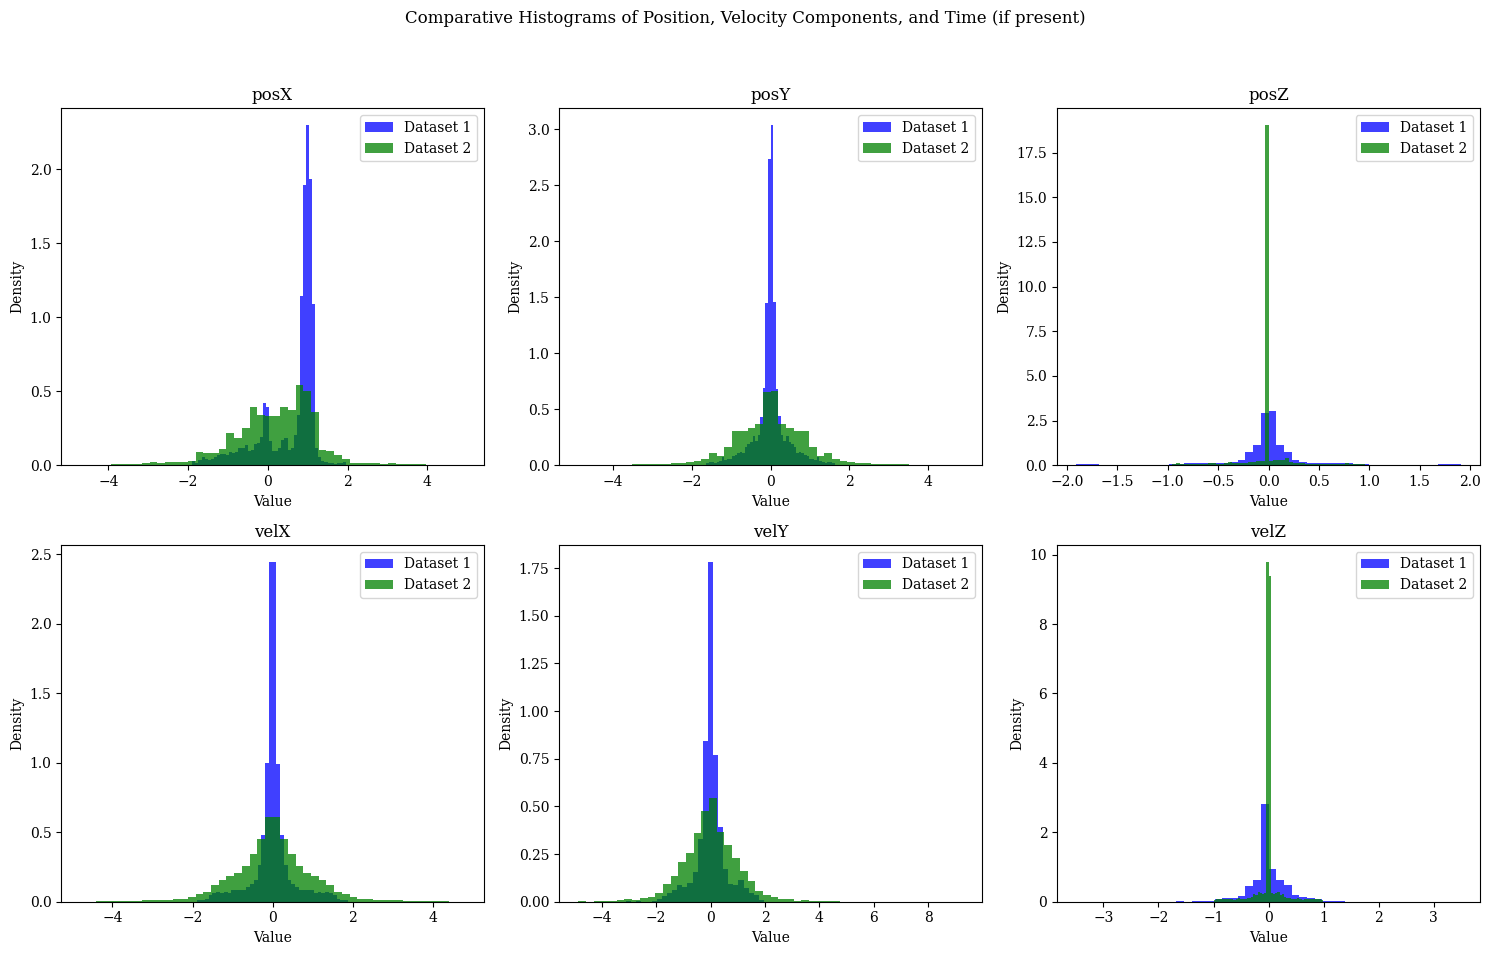

In [ ]:
plot_histograms_comparison(orbit_data[0:200,1:], orbit_data[200:400,1:], normalize=True)

### 5. Dataset

Scripts to build the different datasets used for modeling.

The following function was used to obtain the datasets for the research:

In [ ]:
from orbit_generation.dataset import get_first_period_dataset

The function takes:
- file_path: Path to HDF5 file containing orbit data
- segment_length: Optional length to segment orbits into (default 100)

Returns:
- Segmented orbits as memory-mapped array
- DataFrame with orbit features
- Array of segment IDs
- Dictionary of system features (mass ratios, etc)


### 6. Architectures

Module where different model architectures are defined—such as losses, decoders, and callbacks—designed to be modular and reusable.

In [ ]:
from orbit_generation.architectures import Conv5Encoder

In [ ]:
model = Conv5Encoder(
    seq_len=100,      # Sequence length for input data
    feat_dim=7,       # Feature dimension (number of features per timestep)
    latent_dim=32,    # Dimension of latent space
    dropout_rate=0.1  # Dropout rate for regularization
)
print("Conv5Encoder Summary:")
print(model._modules) # Access modules dictionary since it extends nn.Module

Conv5Encoder Summary:
{'convo_layers': Sequential(
  (0): Conv1d(7, 64, kernel_size=(3,), stride=(1,), padding=same)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=same)
  (4): ReLU()
  (5): Dropout(p=0.1, inplace=False)
  (6): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=same)
  (7): ReLU()
  (8): Dropout(p=0.1, inplace=False)
  (9): Conv1d(64, 64, kernel_size=(9,), stride=(1,), padding=same)
  (10): ReLU()
  (11): Dropout(p=0.1, inplace=False)
  (12): Conv1d(64, 64, kernel_size=(13,), stride=(1,), padding=same)
  (13): ReLU()
  (14): Dropout(p=0.1, inplace=False)
  (15): Flatten(start_dim=1, end_dim=-1)
), 'dense_layers': Sequential(
  (0): Linear(in_features=6400, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
)}


### 7. Propagation

This module enables orbit propagation and measures physical consistency.

In [ ]:
from orbit_generation.propagation import calculate_errors

Cumulative position error for selected orbits: 5.095048112547387e-05
Average position error per time step: 5.14651324499736e-07


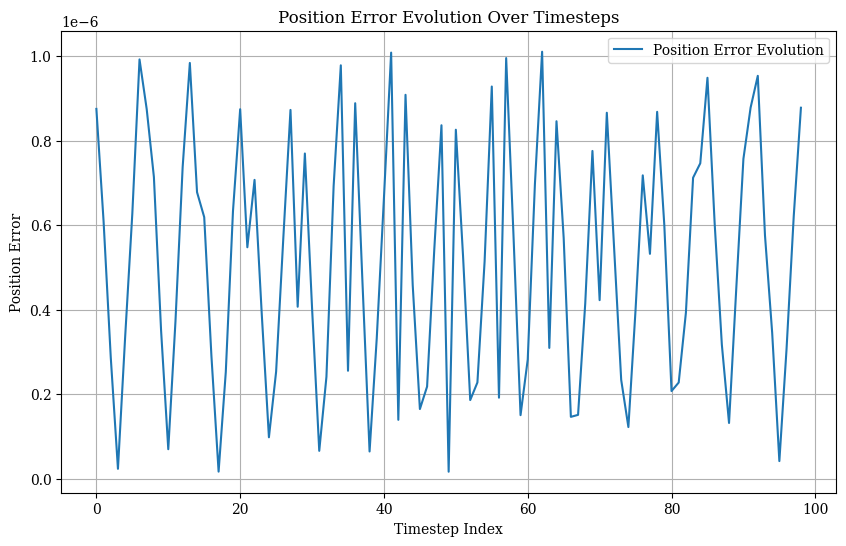

Cumulative velocity error for selected orbits: 0.0001793751728135454
Average velocity error per time step: 1.8118704324600546e-06


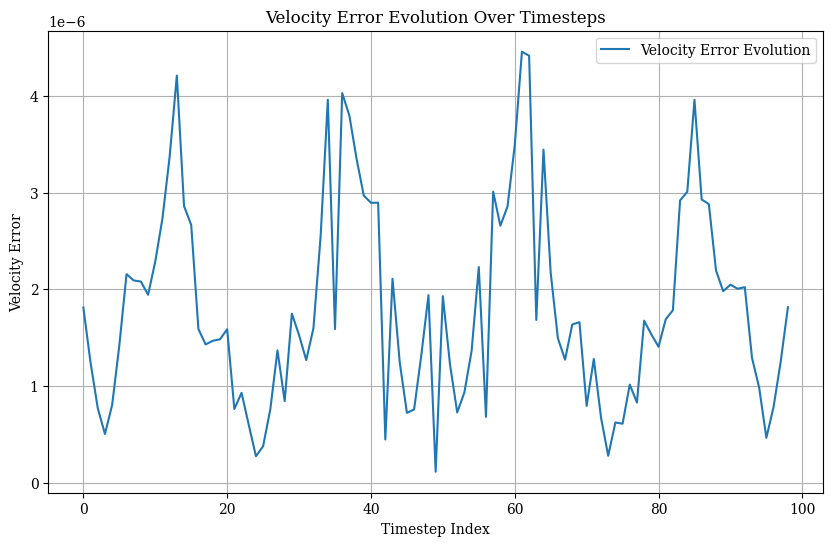

Cumulative energy error for selected orbits: 0.0003757476806640625
Average energy error per time step: 3.7954312119836686e-06


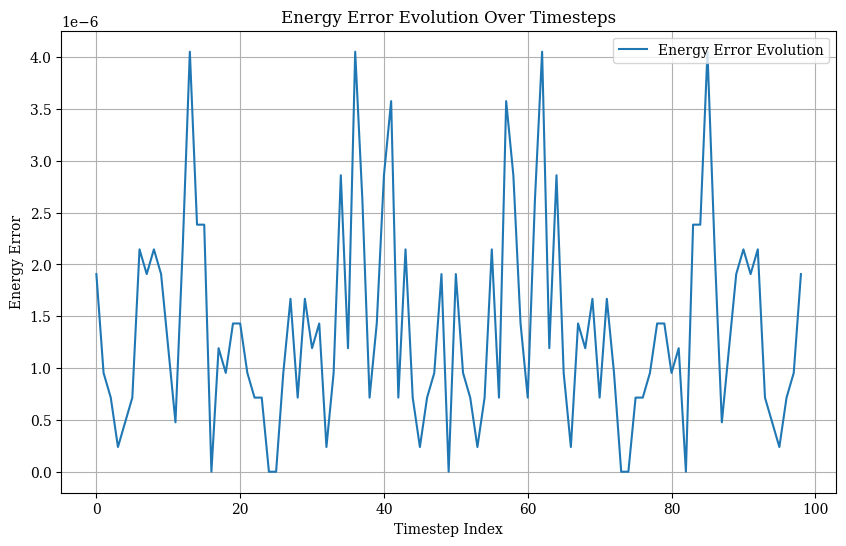

In [ ]:
errors = calculate_errors(orbit_data, EM_MU, orbit_indices = [0])

### 8. Experiment Tools

Scripts to manage data and results and parallelize experiments used in the [`nbs_experiments`](/nbs_experiments/) folder.

### 9. Evaluation

Module to evaluate distances, clustering metrics and vanilla machine learning models.

In [ ]:
from orbit_generation.evaluation import calculate_pairwise_orbit_distances

In [ ]:
calculate_pairwise_orbit_distances(orbit_data[0:1], orbit_data[1:2], distance_metric='manhattan')

array([85.13618469])

### 10. Variational Auto Encoder (VAE)

This module builds VAE models using the architecures from [`6. Architectures`](/nbs/06_architectures.ipynb)

In [ ]:
from orbit_generation.vae import BetaVAE

In [ ]:
print("BetaVAE properties:")
for key, value in BetaVAE.__dict__.items():
    if not key.startswith('_'):
        print(f"- {key}")

BetaVAE properties:
- setup
- encode
- decode
- forward
- reconstruction_loss_by_axis
- default_loss_fn
- training_step
- validation_step
- configure_optimizers
- sample
- on_train_epoch_start
- on_validation_epoch_start


### 11. Model Factory

Module to create model instances based on configuration files.


In [ ]:
from orbit_generation.model_factory import get_model
import torch

In [ ]:
params = {
    'model_name': 'inception_time_vae',
    'seq_len': 100,
    'feature_dim': 6,
    'latent_dim': 32,
    'model_kwargs': {
        'beta': 1.0,
        'lr': 0.001,
        'optimizer_cls': torch.optim.Adam
    }
}

model = get_model(params)

### 12. Convergence


Script to perform a Multiple Shooting algorithm on the synthetic orbits to process differential corrections until they become physically valid.

Example of synthetic orbits (left) and its refined versions (right):

![Sampling Generations](/nbs_experiments/01_generative_discovery_em/figures/exp116_samplings_gener_ref.png)

### 13. Latent Space

Module to explore a model's latent space, visualize it, apply dimensionality reduction techniques, and perform sampling.

Examples of plots produced with this module:

![exp3_latent_space](/nbs_experiments/01_generative_discovery_em/figures/exp3_latent_space.png)

![combined_latent_spaces](/nbs_experiments/01_generative_discovery_em/figures/combined_latent_spaces.png)

![exp3_regressions](/nbs_experiments/01_generative_discovery_em/figures/exp3_regressions.png)

## Generative Discovery Experiment

![exp_diagram](/nbs_experiments/01_generative_discovery_em/figures/exp_diagram.jpg)

### 0. Figures

Exported images of the experiments below.

### 1. Exploratory Data Analysis of Earth-Moon Periodic Orbits

This [notebook](/nbs_experiments/01_generative_discovery_em/01_eda_em_system.ipynb) explores the dataset by visualizing the orbits, the proportions within families, the initial conditions, and the distribution of features.

### 2. Orbit Family Analysis

This [notebook](/nbs_experiments/01_generative_discovery_em/02_orbit_family_analysis.ipynb) searches for the best properties of the orbits that define their family through clustering and machine learning techniques.

### 3. Generative Discovery

These notebooks ([03_01_generative_discovery](/nbs_experiments/01_generative_discovery_em/03_01_generative_discovery.ipynb), [03_02_experiment_parameterization](/nbs_experiments/01_generative_discovery_em/03_02_experiment_parameterization.ipynb), [03_03_discovery_results](/nbs_experiments/01_generative_discovery_em/03_03_discovery_results.ipynb), [03_04_ml_classification_discovery](/nbs_experiments/01_generative_discovery_em/03_04_ml_classification_discovery.ipynb), [03_05_distance_discovery](/nbs_experiments/01_generative_discovery_em/03_05_distance_discovery.ipynb)) perform the "Generative Discovery" experiment by training a VAE on a subset of the dataset, generating orbits and refining them, obtaining metrics and visual explorations throughout the entire process. The first notebooks are used for running the experiments and the later ones for analyzing the results.

### 4. Convergence Analysis

This [notebook](/nbs_experiments/01_generative_discovery_em/04_convergence_analysis.ipynb) performs a convergence analysis of the synthetic orbits generated by the VAE, studying the effect of certain parameters for the multiple shooting algorithm.

### 5. Model Analysis

This [notebook](/nbs_experiments/01_generative_discovery_em/05_model_analysis.ipynb) performs an analysis of a specific model to deepen the understanding of the model's behavior.